# Regresie logistică (nu merge)
pentru colerarea rapoarterol imagistice cu evoluția pacienților

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# Load the data
df = pd.read_csv('anonim-clean.csv')

# Preprocessing
imaging_characteristics = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară', 'osteofite', 'deshidratări_discale', 'gadolinofilie', 'iodofilie', 'hdl', 'hemangioame', 'abces', 'fracturi', 'anterolistezis', 'cardiomegalie']

# Create binary columns for each imaging characteristic
for char in imaging_characteristics:
    df[char] = df['caracteristici imagistice'].str.contains(char, case=False, na=False).astype(int)

# Create binary column for evolution (favorable vs unfavorable)
df['evolution_favorable'] = df['evoluție'].replace({'favorabilă': 1, 'lent_favorabilă': 1, 'nefavorabilă': 0, 'cerere': np.nan, 'sub_tratament': np.nan})

# Remove rows with NaN values in the target variable
df = df.dropna(subset=['evolution_favorable'])

# Prepare the features (X) and target variable (y)
X = df[imaging_characteristics]
y = df['evolution_favorable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate odds ratios and confidence intervals
# Remove columns with zero variance
X = X.loc[:, (X != 0).any(axis=0)]

# Remove linearly dependent columns
X = X.loc[:, ~X.columns.duplicated()]

X_with_constant = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_constant)
results = logit_model.fit()
sns.pointplot(x='Odds Ratio', y='Characteristic', data=odds_ratios, join=False, color='blue')
plt.errorbar(x=odds_ratios['Odds Ratio'], y=range(len(odds_ratios)), 
             xerr=[odds_ratios['Odds Ratio'] - odds_ratios['Lower CI'], 
                   odds_ratios['Upper CI'] - odds_ratios['Odds Ratio']], 
             fmt='none', c='blue', capsize=3)
plt.axvline(x=1, color='red', linestyle='--')
plt.xscale('log')
plt.title('Forest Plot of Odds Ratios for Imaging Characteristics')
plt.xlabel('Odds Ratio (log scale)')
plt.tight_layout()
# plt.savefig('forest_plot.png')
# plt.close()
plt.show()

print("\nForest plot has been saved as 'forest_plot.png'.")
print("Odds ratios have been saved to 'odds_ratios.csv'.")

/var/folders/l3/3tb_25kj547gmktfzvf0_sl00000gn/T/ipykernel_5037/2832497891.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['evolution_favorable'] = df['evoluție'].replace({'favorabilă': 1, 'lent_favorabilă': 1, 'nefavorabilă': 0, 'cerere': np.nan, 'sub_tratament': np.nan})
/opt/anaconda3/envs/dis/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/dis/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and b

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9


Confusion Matrix:
[[0 3]
 [0 6]]
         Current function value: 0.186378
         Iterations: 35


LinAlgError: Singular matrix

# tot chi și fisher

/var/folders/l3/3tb_25kj547gmktfzvf0_sl00000gn/T/ipykernel_6594/982199615.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['evolution_favorable'] = df['evoluție'].replace({'favorabilă': 1, 'lent_favorabilă': 1, 'nefavorabilă': 0, 'cerere': np.nan, 'sub_tratament': np.nan})


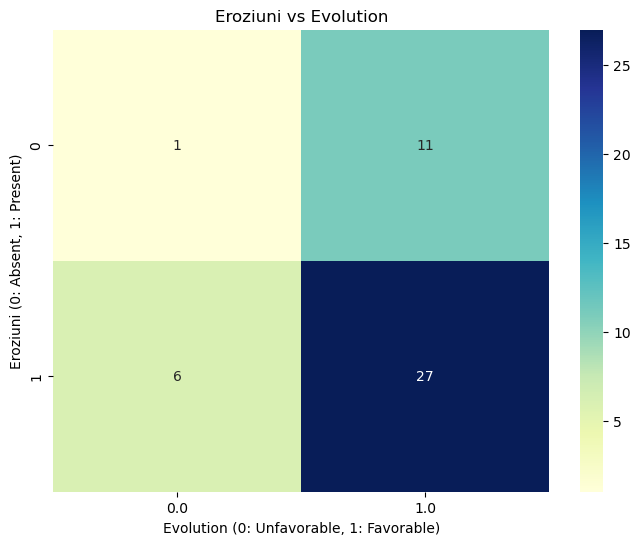

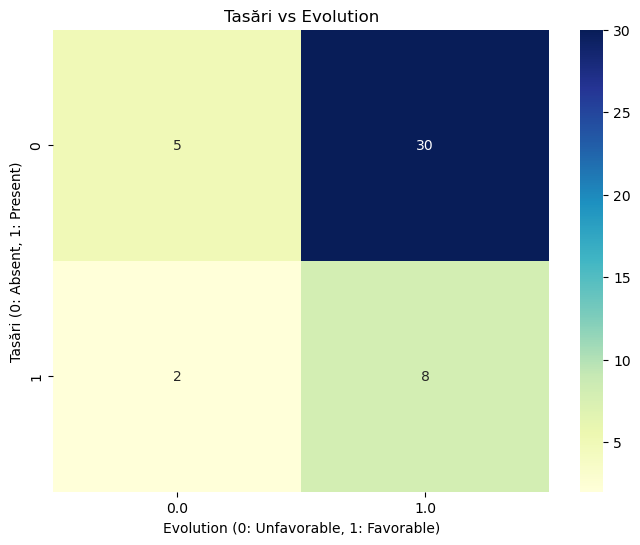

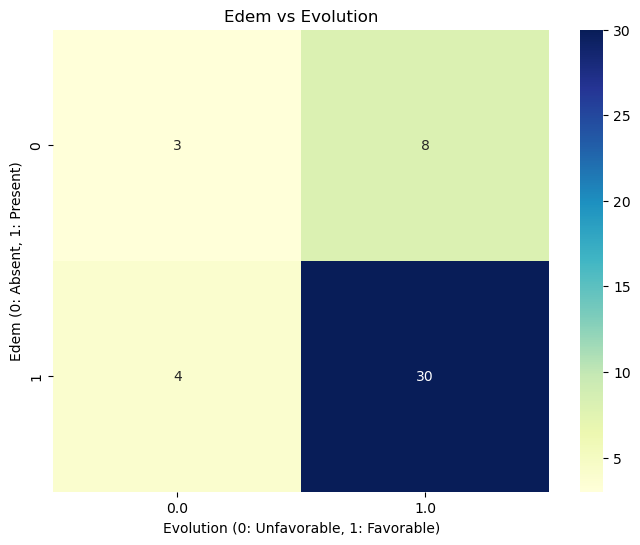

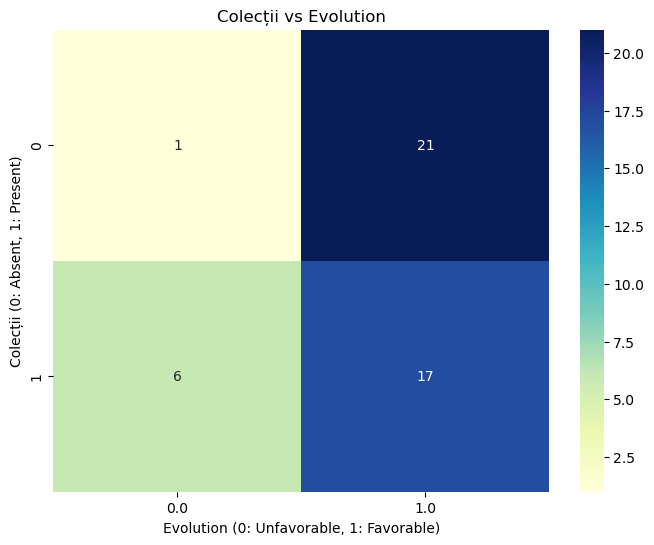

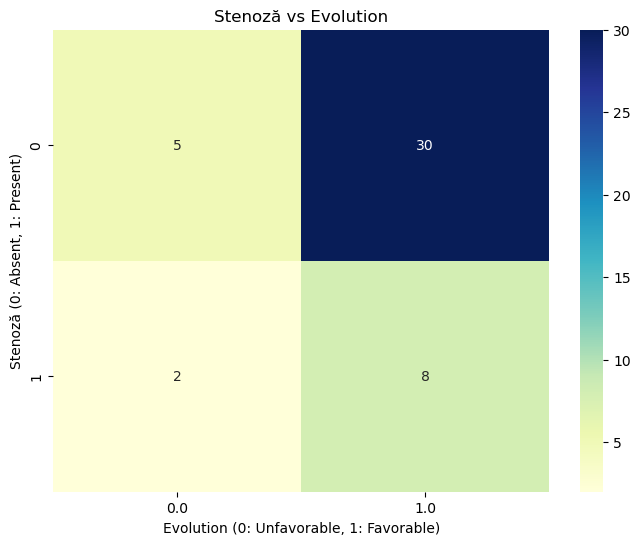

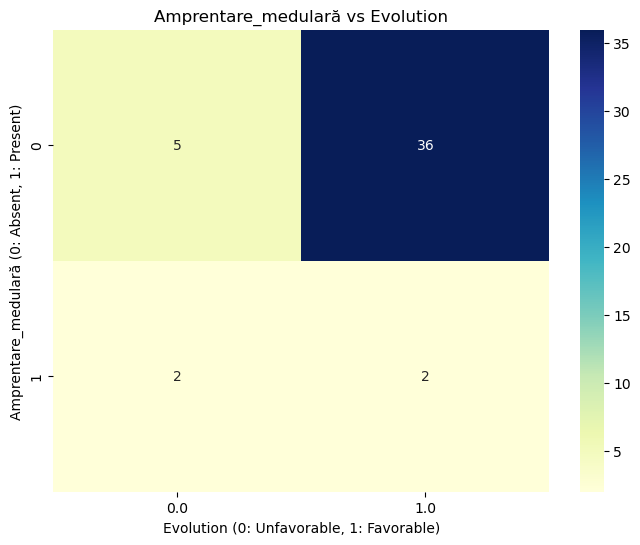

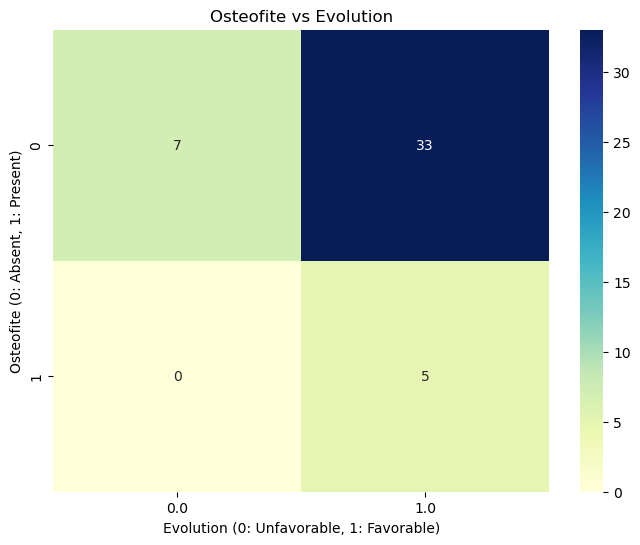

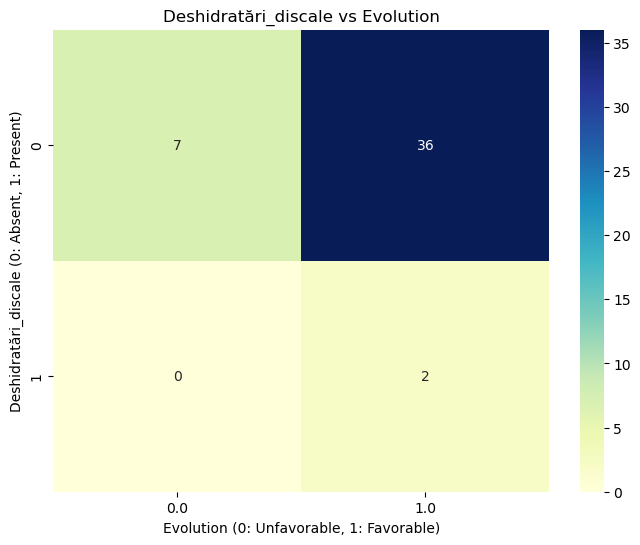

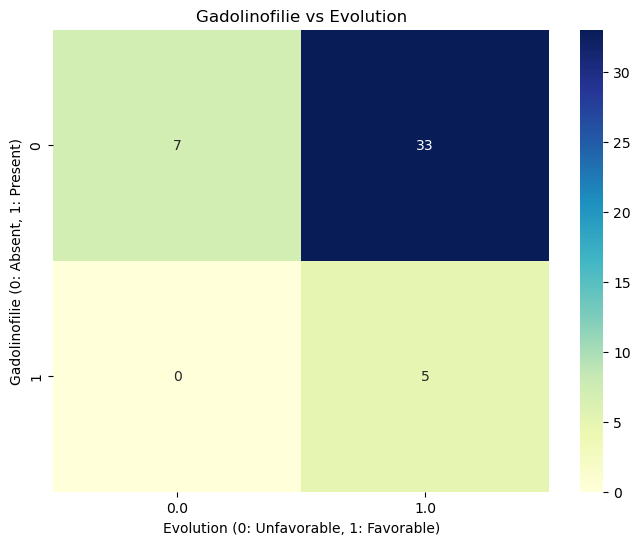

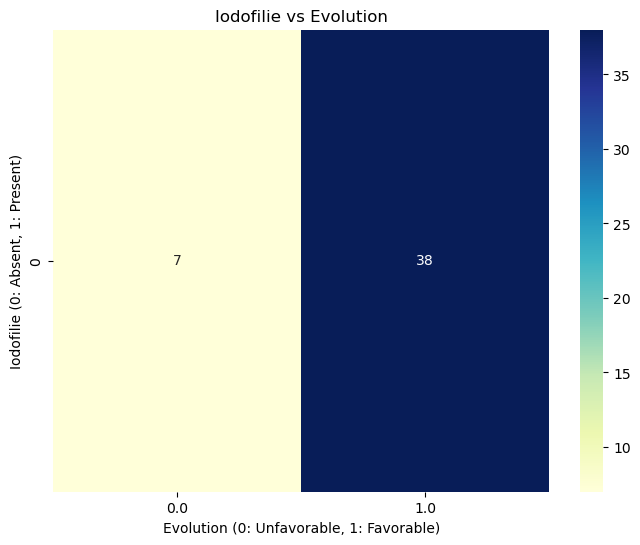

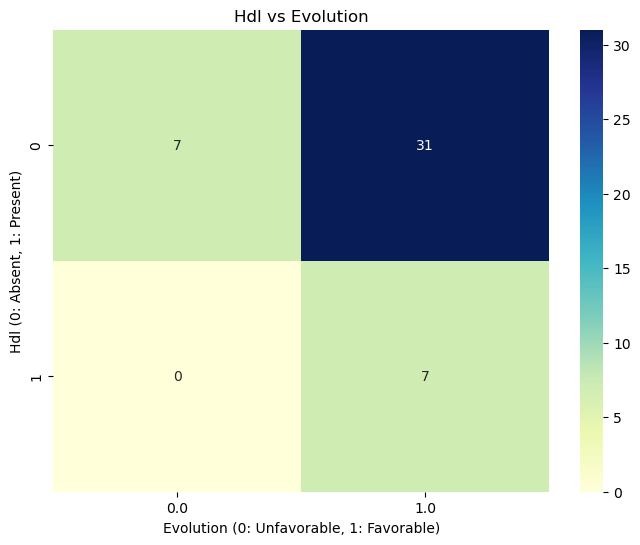

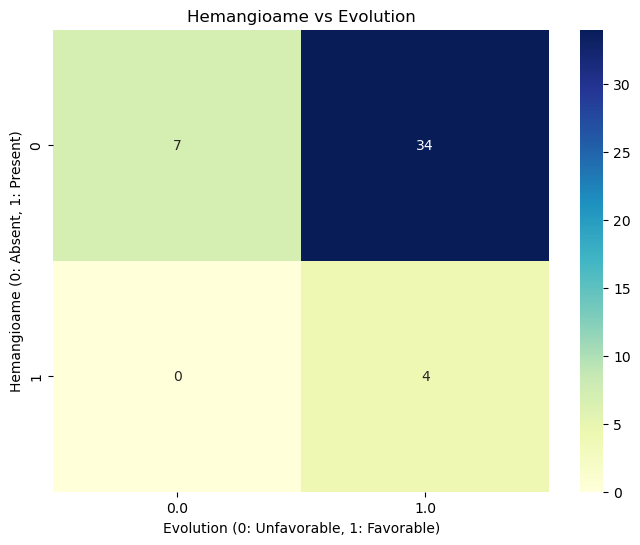

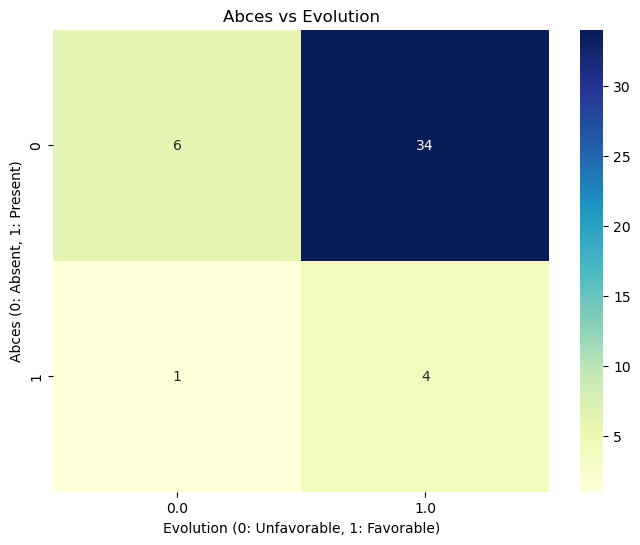

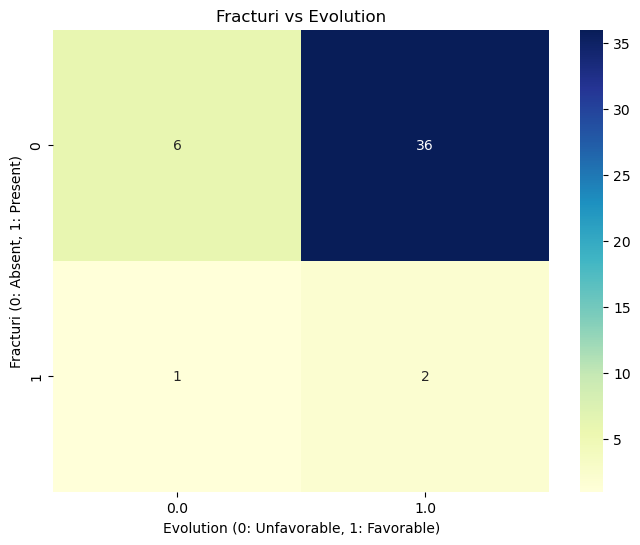

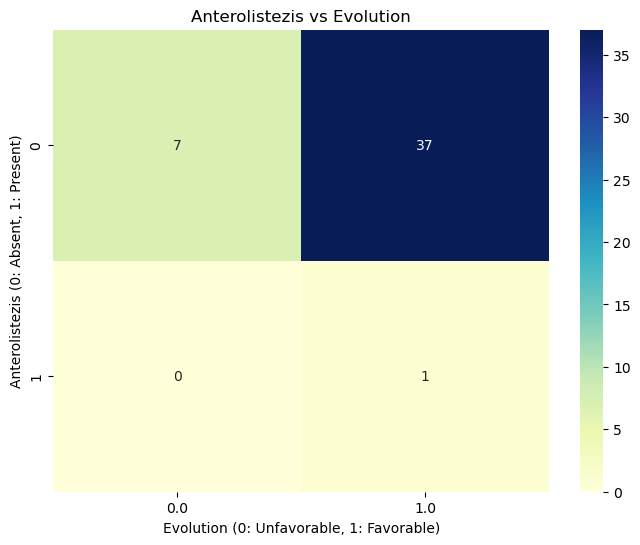

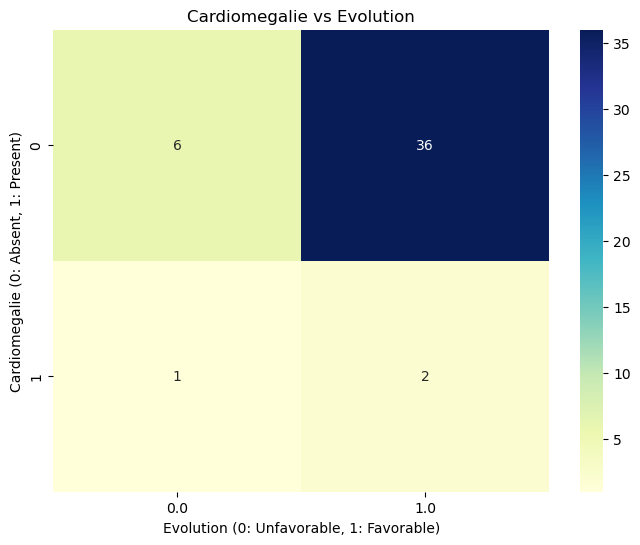

      Characteristic           Test Type  p-value Significant
            colecții Fisher's exact test 0.095916          No
 amprentare_medulară Fisher's exact test 0.108245          No
                edem Fisher's exact test 0.336750          No
            fracturi Fisher's exact test 0.405497          No
       cardiomegalie Fisher's exact test 0.405497          No
                 hdl Fisher's exact test 0.574153          No
           osteofite Fisher's exact test 0.577081          No
       gadolinofilie Fisher's exact test 0.577081          No
              tasări Fisher's exact test 0.642315          No
             stenoză Fisher's exact test 0.642315          No
            eroziuni Fisher's exact test 0.654819          No
deshidratări_discale Fisher's exact test 1.000000          No
           iodofilie     Chi-square test 1.000000          No
         hemangioame Fisher's exact test 1.000000          No
               abces Fisher's exact test 1.000000          No
      an

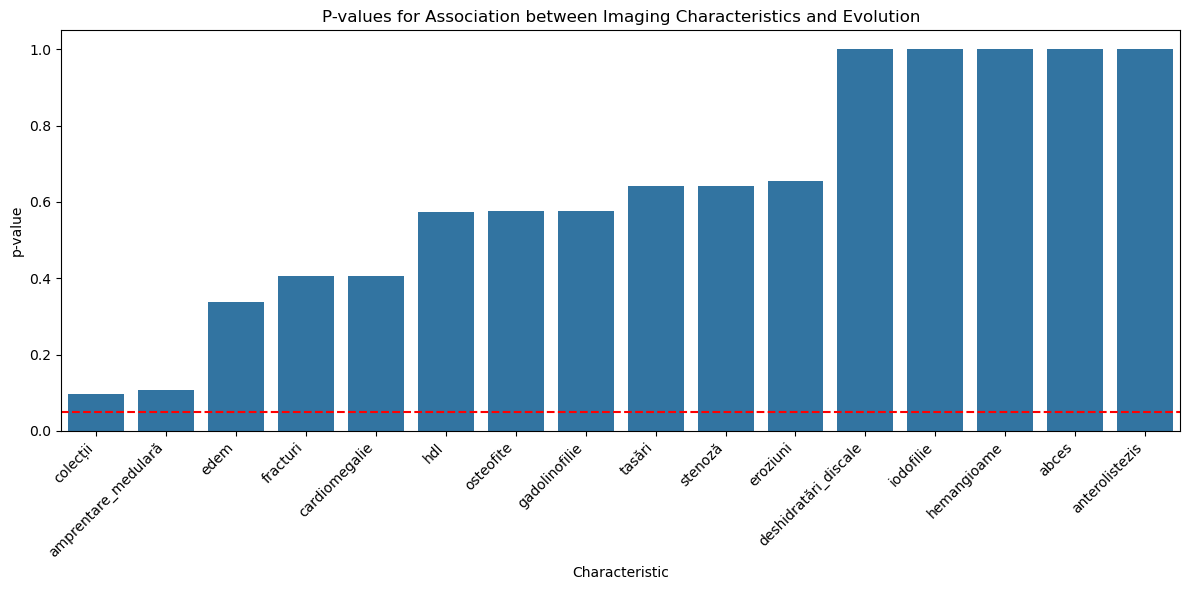


Mosaic plots have been saved as PNG files.
Statistical test results have been saved to 'statistical_test_results_evolution.csv'.
P-values plot has been saved as 'p_values_plot.png'.

Frequency of Imaging Characteristics:
edem                    34
eroziuni                33
colecții                23
tasări                  10
stenoză                 10
hdl                      7
osteofite                5
gadolinofilie            5
abces                    5
amprentare_medulară      4
hemangioame              4
fracturi                 3
cardiomegalie            3
deshidratări_discale     2
anterolistezis           1
iodofilie                0
dtype: int64


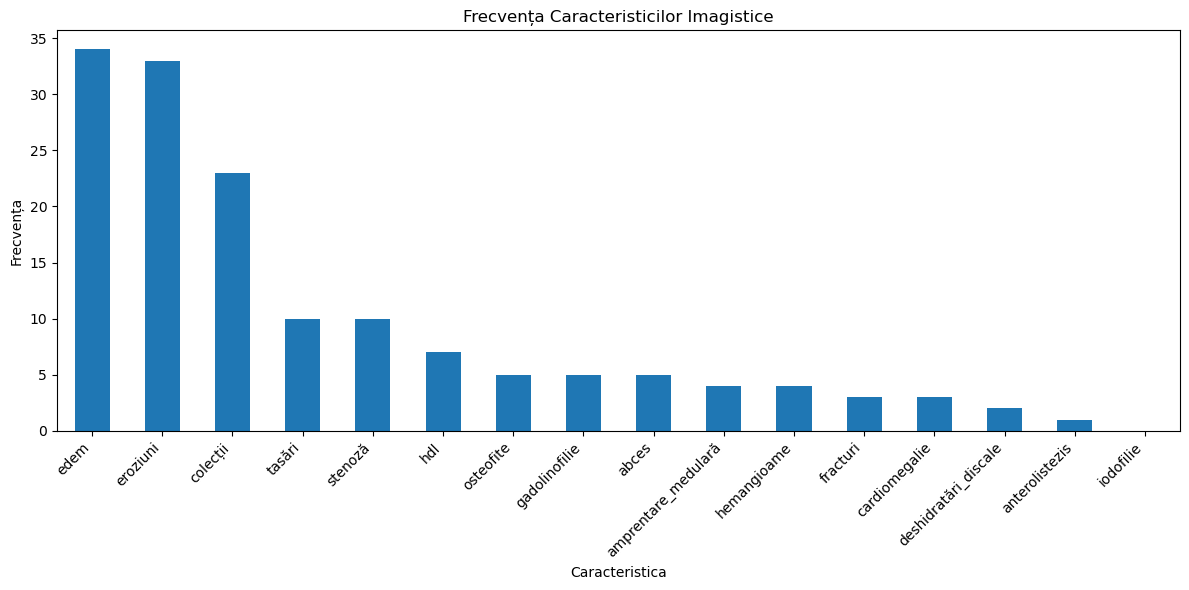


Characteristic frequencies plot has been saved as 'characteristic_frequencies.png'.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('anonim-clean.csv')

# Preprocessing
imaging_characteristics = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară', 'osteofite', 'deshidratări_discale', 'gadolinofilie', 'iodofilie', 'hdl', 'hemangioame', 'abces', 'fracturi', 'anterolistezis', 'cardiomegalie']

# Create binary columns for each imaging characteristic
for char in imaging_characteristics:
    df[char] = df['caracteristici imagistice'].str.contains(char, case=False, na=False).astype(int)

# Create binary column for evolution (favorable vs unfavorable)
df['evolution_favorable'] = df['evoluție'].replace({'favorabilă': 1, 'lent_favorabilă': 1, 'nefavorabilă': 0, 'cerere': np.nan, 'sub_tratament': np.nan})

# Remove rows with NaN values in the target variable
df = df.dropna(subset=['evolution_favorable'])

# Function to perform statistical test and create mosaic plot
def analyze_characteristic(characteristic):
    contingency_table = pd.crosstab(df[characteristic], df['evolution_favorable'])
    
    # Perform chi-square or Fisher's exact test
    if (contingency_table.values < 5).any():
        _, p_value = fisher_exact(contingency_table)
        test_type = "Fisher's exact test"
    else:
        _, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = "Chi-square test"
    
    # Create mosaic plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'{characteristic.capitalize()} vs Evolution')
    plt.xlabel('Evolution (0: Unfavorable, 1: Favorable)')
    plt.ylabel(f'{characteristic.capitalize()} (0: Absent, 1: Present)')
    plt.savefig(f'{characteristic}_mosaic.png')
    # plt.close()
    plt.show()
    return pd.DataFrame({
        'Characteristic': [characteristic],
        'Test Type': [test_type],
        'p-value': [p_value],
        'Significant': ['Yes' if p_value < 0.05 else 'No']
    })

# Analyze all characteristics and compile results
results = pd.concat([analyze_characteristic(char) for char in imaging_characteristics])

# Sort results by p-value
results = results.sort_values('p-value')

# Display the results table
print(results.to_string(index=False))

# Save results to CSV
results.to_csv('statistical_test_results_evolution.csv', index=False)

# Create a bar plot of p-values
plt.figure(figsize=(12, 6))
sns.barplot(x='Characteristic', y='p-value', data=results)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Association between Imaging Characteristics and Evolution')
plt.tight_layout()
plt.savefig('p_values_plot.png')
# plt.close()
plt.show()

print("\nMosaic plots have been saved as PNG files.")
print("Statistical test results have been saved to 'statistical_test_results_evolution.csv'.")
print("P-values plot has been saved as 'p_values_plot.png'.")

# Calculate and display the frequency of each characteristic
characteristic_frequencies = df[imaging_characteristics].sum().sort_values(ascending=False)
print("\nFrequency of Imaging Characteristics:")
print(characteristic_frequencies)

# Create a bar plot of characteristic frequencies
plt.figure(figsize=(12, 6))
characteristic_frequencies.plot(kind='bar')
plt.title('Frecvența Caracteristicilor Imagistice')
plt.xlabel('Caracteristica')
plt.ylabel('Frecvența')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('characteristic_frequencies.png')
# plt.close()
plt.show()

print("\nCharacteristic frequencies plot has been saved as 'characteristic_frequencies.png'.")